<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=078ebca09bcf9176a7028a58f65137d64bb3e4da1fd52ba4a39e7f3923770605
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


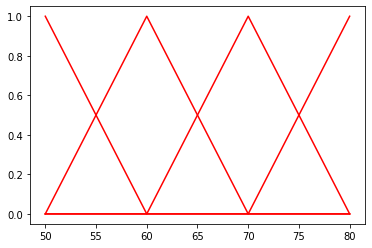

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x = np.arange(50, 81, 1)
slow = fuzz.trimf(x, [50,50,60])
plt.figure();
plt.plot(x, slow,'r', linewidth=1.5, label='Slow');
plt.plot;
slow = fuzz.trimf(x, [50,60,70])
plt.plot(x, slow,'r', linewidth=1.5, label='Medium');
plt.plot;
slow = fuzz.trimf(x, [60,70,80])
plt.plot(x, slow,'r', linewidth=1.5, label='Medium fast');
plt.plot;
slow = fuzz.trimf(x, [70,80,80])
plt.plot(x, slow,'r', linewidth=1.5, label='Full speed');
plt.plot;



21.006989346256876


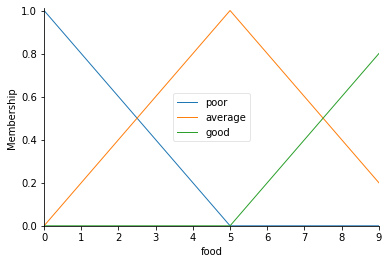

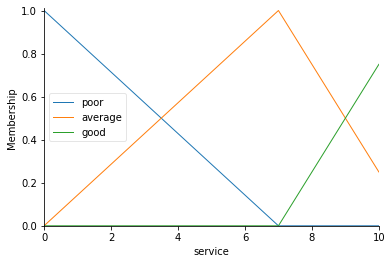

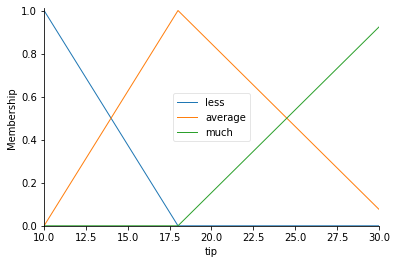

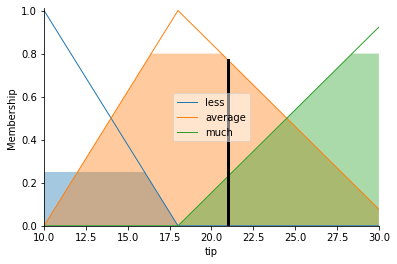

In [ ]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,10,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,7])
service['average']= fuzz.trimf(service.universe,[0,7,11])
service['good']= fuzz.trimf(service.universe,[7,11,11])

tip['less']= fuzz.trimf(tip.universe,[10,10,18])
tip['average']= fuzz.trimf(tip.universe,[10,18,31])
tip['much']= fuzz.trimf(tip.universe,[18,31,31])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor'] | service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average'] | service['average'],tip['average'])
rule3 = ctrl.Rule(food['good'] | service['good'],tip['much'])
rule4 = ctrl.Rule(food['poor'] | service['average'],tip['less'])
rule5 = ctrl.Rule(food['poor'] | service['good'],tip['average'])
rule6 = ctrl.Rule(food['average'] | service['poor'],tip['less'])
rule7 = ctrl.Rule(food['average'] | service['good'],tip['much'])
rule8 = ctrl.Rule(food['good'] | service['poor'],tip['average'])
rule9 = ctrl.Rule(food['good'] | service['average'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

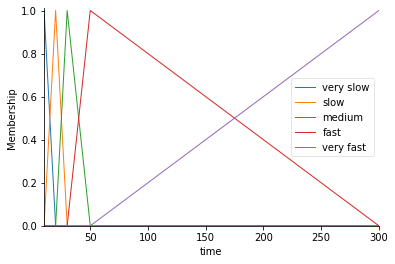

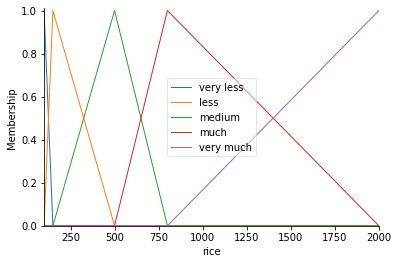

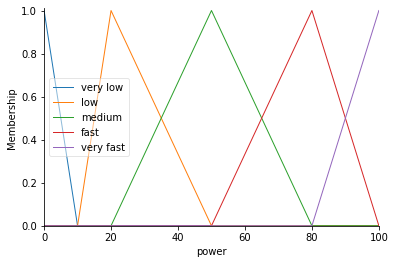

In [ ]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very slow']= fuzz.trimf(time.universe,[10,10,20])
time['slow']= fuzz.trimf(time.universe,[10,20,30])
time['medium']= fuzz.trimf(time.universe,[20,30,50])
time['fast']= fuzz.trimf(time.universe,[30,50,300])
time['very fast']= fuzz.trimf(time.universe,[50,300,300])

rice['very less']= fuzz.trimf(rice.universe,[100,100,150])
rice['less']= fuzz.trimf(rice.universe,[100,150,500])
rice['medium']= fuzz.trimf(rice.universe,[150,500,800])
rice['much']= fuzz.trimf(rice.universe,[500,800,2000])
rice['very much']= fuzz.trimf(rice.universe,[800,2000,2000])

power['very low']= fuzz.trimf(power.universe,[0,0,10])
power['low']= fuzz.trimf(power.universe,[10,20,50])
power['medium']= fuzz.trimf(power.universe,[20,50,80])
power['fast']= fuzz.trimf(power.universe,[50,80,100])
power['very fast']= fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(rice['very less']& time['very slow'], power['very low'])
rule2 = ctrl.Rule(rice['very less']& time['slow'], power['low'])
rule3 = ctrl.Rule(rice['very less']& time['medium'], power['medium'])
rule4 = ctrl.Rule(rice['very less']& time['fast'], power['fast'])
rule5 = ctrl.Rule(rice['very less']& time['very fast'], power['very fast'])
rule6 = ctrl.Rule(rice['less']& time['very slow'], power['very low'])
rule7 = ctrl.Rule(rice['less']& time['slow'], power['low'])
rule8 = ctrl.Rule(rice['less']& time['medium'], power['low'])
rule9 = ctrl.Rule(rice['less']& time['fast'], power['medium'])
rule10 = ctrl.Rule(rice['less']& time['very fast'], power['medium'])
rule11 = ctrl.Rule(rice['medium']& time['very slow'], power['very low'])
rule12 = ctrl.Rule(rice['medium']& time['slow'], power['medium'])
rule13 = ctrl.Rule(rice['medium']& time['medium'], power['medium'])
rule14 = ctrl.Rule(rice['medium']& time['fast'], power['medium'])
rule15 = ctrl.Rule(rice['medium']& time['very fast'], power['fast'])
rule16 = ctrl.Rule(rice['much']& time['very slow'], power['medium'])
rule17 = ctrl.Rule(rice['much']& time['slow'], power['medium'])
rule18 = ctrl.Rule(rice['much']& time['medium'], power['fast'])
rule19 = ctrl.Rule(rice['much']& time['fast'], power['fast'])
rule20 = ctrl.Rule(rice['much']& time['very fast'], power['very fast'])
rule21 = ctrl.Rule(rice['very much']& time['very slow'], power['medium'])
rule22 = ctrl.Rule(rice['very much']& time['slow'], power['medium'])
rule23 = ctrl.Rule(rice['very much']& time['medium'], power['fast'])
rule24 = ctrl.Rule(rice['very much']& time['fast'], power['very fast'])
rule25 = ctrl.Rule(rice['very much']& time['very fast'], power['very fast'])




59.019607843137315


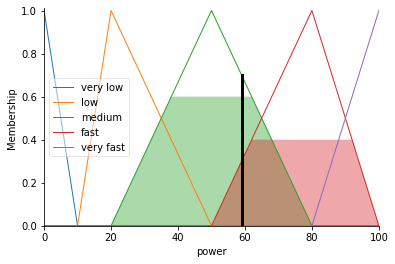

In [ ]:
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering= ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']= 150 #10-300
powering.input['rice']= 500 #100-2000
powering.compute()
print(powering.output['power'])
power.view(sim=powering)